In [1]:
import sys
import os

import sqlite3
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

sys.path.insert(0, '../src') # add library code to path

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Download Zipped XML Wikipedia Data

* The Wikimedia Dumps are located at ```https://dumps.wikimedia.org/enwiki/20200401/```
* Make sure to change the date at the end to the first day of a recent month

In [2]:
from wikiparser import download_metadata_zips

num_files_download = 1
zip_outdir = "../data/raw/zips"
meta_date = '20200401'
overwrite_current = False

download_metadata_zips(num_files_download, zip_outdir , meta_date, overwrite=overwrite_current)

https://dumps.wikimedia.org/enwiki/20200401/enwiki-20200401-stub-meta-history1.xml.gz


In [3]:
zips = os.listdir(zip_outdir)
zips

['metadata-20200401-1.xml.gz']

# 2. Unzip XML Files

* Grab all .gz files and attempt to unzip

In [4]:
from wikiparser import gunzip_shutil

extract_outdir = "../data/raw/extracted"

for gzip_file in os.listdir(zip_outdir ):
    if gzip_file[-2:] == "gz":
        gunzip_shutil(zip_outdir + "/" + gzip_file, extract_outdir)
    

Extracted file already exists: ../data/raw/extracted/metadata-20200401-1.xml


# 3. Processing Raw Data to Lightdump

* Process 1500 articles making sure to include the ones passed in the list ```articles```
* Ignore less revised articles with under 800 revisions

In [5]:
from wikiparser import parse_metadata_to_lightdump

# Parse the Wikimedia Metadata XML File into Lightdump Format
file_to_parse = "../data/raw/extracted/metadata-20200401-1.xml"
lightdump_filename = "popularity_lightdump.txt"
temp_dir = "../data/temp"
articles = ['American_Football_Conference', 'Blizzard_Entertainment', 'American_League_Championship_Series']
num_articles_to_process = 800
min_revisions = 500

parse_metadata_to_lightdump(file_to_parse, 
                            lightdump_filename, 
                            temp_dir, 
                            articles, 
                            num_articles_to_process, 
                            min_revisions)

Lightdump File Already Exists


# Visualize Lightdump Article Byte Size

* We see a lot of noise in these graphs of byte size, sometimes caused by internet griefers
* Many revisions actually condense or move information to branch article pages thereby reducing byte size

In [6]:
from engagement_score import create_wiki_graph

output_dir = "../data/out"
lightdump_filepath = temp_dir + "/" + lightdump_filename

Starting Lightdump Parse for: American_League_Championship_Series
Finished Lightdump Parse => num revisions: 812
Saving plot to "../data/out/American_League_Championship_Series.png"


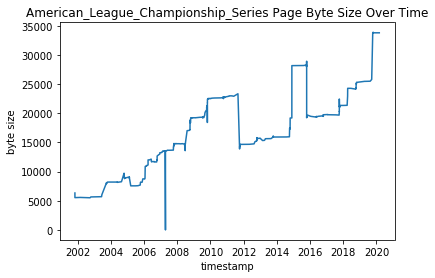

In [7]:
fig1 = create_wiki_graph(lightdump_filepath, 
                         'American_League_Championship_Series', 
                         output_dir)

Starting Lightdump Parse for: Blizzard_Entertainment
Finished Lightdump Parse => num revisions: 4128
Saving plot to "../data/out/Blizzard_Entertainment.png"


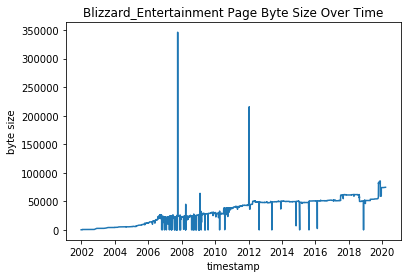

In [8]:
fig2 = create_wiki_graph(lightdump_filepath, "Blizzard_Entertainment", output_dir)

# 4. Lightdump to DB Averaged by Month

* Creating metrics to use for Engagement Score

#### For each article:
1. Averaging Byte Size over each month
2. Counting number of unique editors per month
3. Counting number of edits per month

In [17]:
from engagement_score import lightdump_to_db

db_outfile = temp_dir + "/articles.db"

lightdump_to_db(lightdump_filepath, db_outfile, num_articles_to_process) # num_articles_to_process = 1500

1: FINISHED LIGHTDUMP PARSE FOR:   Anarchism		 NUM REVISIONS: 19218
2: FINISHED LIGHTDUMP PARSE FOR:   Autism		 NUM REVISIONS: 10313
3: FINISHED LIGHTDUMP PARSE FOR:   Albedo		 NUM REVISIONS: 1193
4: FINISHED LIGHTDUMP PARSE FOR:   A		 NUM REVISIONS: 4714
5: FINISHED LIGHTDUMP PARSE FOR:   Alabama		 NUM REVISIONS: 9455
6: FINISHED LIGHTDUMP PARSE FOR:   Achilles		 NUM REVISIONS: 7137
7: FINISHED LIGHTDUMP PARSE FOR:   Abraham_Lincoln		 NUM REVISIONS: 16756
8: FINISHED LIGHTDUMP PARSE FOR:   Aristotle		 NUM REVISIONS: 9049
9: FINISHED LIGHTDUMP PARSE FOR:   Academy_Award_for_Best_Production_Design		 NUM REVISIONS: 1210
10: FINISHED LIGHTDUMP PARSE FOR:   Academy_Awards		 NUM REVISIONS: 8128
11: FINISHED LIGHTDUMP PARSE FOR:   Altruism		 NUM REVISIONS: 2251
12: FINISHED LIGHTDUMP PARSE FOR:   Ayn_Rand		 NUM REVISIONS: 11936
13: FINISHED LIGHTDUMP PARSE FOR:   Algeria		 NUM REVISIONS: 10517
14: FINISHED LIGHTDUMP PARSE FOR:   List_of_Atlas_Shrugged_characters		 NUM REVISIONS: 1018
15: FIN

118: FINISHED LIGHTDUMP PARSE FOR:   A._A._Milne		 NUM REVISIONS: 1575
119: FINISHED LIGHTDUMP PARSE FOR:   Axiom		 NUM REVISIONS: 1287
120: FINISHED LIGHTDUMP PARSE FOR:   The_Amazing_Spider-Man		 NUM REVISIONS: 1383
121: FINISHED LIGHTDUMP PARSE FOR:   Antigua_and_Barbuda		 NUM REVISIONS: 2486
122: FINISHED LIGHTDUMP PARSE FOR:   Albert_Speer		 NUM REVISIONS: 3911
123: FINISHED LIGHTDUMP PARSE FOR:   Asteraceae		 NUM REVISIONS: 1024
124: FINISHED LIGHTDUMP PARSE FOR:   Axon		 NUM REVISIONS: 996
125: FINISHED LIGHTDUMP PARSE FOR:   Ataxia		 NUM REVISIONS: 871
126: FINISHED LIGHTDUMP PARSE FOR:   Ada_Lovelace		 NUM REVISIONS: 4615
127: FINISHED LIGHTDUMP PARSE FOR:   Alps		 NUM REVISIONS: 4097
128: FINISHED LIGHTDUMP PARSE FOR:   Albert_Camus		 NUM REVISIONS: 3921
129: FINISHED LIGHTDUMP PARSE FOR:   Agatha_Christie		 NUM REVISIONS: 6284
130: FINISHED LIGHTDUMP PARSE FOR:   The_Plague		 NUM REVISIONS: 823
131: FINISHED LIGHTDUMP PARSE FOR:   Absolute_value		 NUM REVISIONS: 1695
132: FI

232: FINISHED LIGHTDUMP PARSE FOR:   Ammonia		 NUM REVISIONS: 4059
233: FINISHED LIGHTDUMP PARSE FOR:   Amethyst		 NUM REVISIONS: 2159
234: FINISHED LIGHTDUMP PARSE FOR:   Albertosaurus		 NUM REVISIONS: 1006
235: FINISHED LIGHTDUMP PARSE FOR:   Assembly_language		 NUM REVISIONS: 2576
236: FINISHED LIGHTDUMP PARSE FOR:   Ambrose		 NUM REVISIONS: 1366
237: FINISHED LIGHTDUMP PARSE FOR:   Amber		 NUM REVISIONS: 3064
238: FINISHED LIGHTDUMP PARSE FOR:   Army		 NUM REVISIONS: 2324
239: FINISHED LIGHTDUMP PARSE FOR:   Arachnophobia		 NUM REVISIONS: 1588
240: FINISHED LIGHTDUMP PARSE FOR:   Talk:Alan_Turing		 NUM REVISIONS: 1139
241: FINISHED LIGHTDUMP PARSE FOR:   Amazing_Grace		 NUM REVISIONS: 2752
242: FINISHED LIGHTDUMP PARSE FOR:   AOL		 NUM REVISIONS: 5309
243: FINISHED LIGHTDUMP PARSE FOR:   Anno_Domini		 NUM REVISIONS: 3837
244: FINISHED LIGHTDUMP PARSE FOR:   Alcuin		 NUM REVISIONS: 803
245: FINISHED LIGHTDUMP PARSE FOR:   Amine		 NUM REVISIONS: 929
246: FINISHED LIGHTDUMP PARSE FOR:

350: FINISHED LIGHTDUMP PARSE FOR:   April_14		 NUM REVISIONS: 3794
351: FINISHED LIGHTDUMP PARSE FOR:   Talk:Aikido		 NUM REVISIONS: 1375
352: FINISHED LIGHTDUMP PARSE FOR:   Astoria,_Oregon		 NUM REVISIONS: 1071
353: FINISHED LIGHTDUMP PARSE FOR:   Art_Deco		 NUM REVISIONS: 6280
354: FINISHED LIGHTDUMP PARSE FOR:   ASCII_art		 NUM REVISIONS: 3332
355: FINISHED LIGHTDUMP PARSE FOR:   Talk:Assault_rifle		 NUM REVISIONS: 929
356: FINISHED LIGHTDUMP PARSE FOR:   American_English		 NUM REVISIONS: 3755
357: FINISHED LIGHTDUMP PARSE FOR:   Australian_English		 NUM REVISIONS: 4263
358: FINISHED LIGHTDUMP PARSE FOR:   American_Airlines_Flight_77		 NUM REVISIONS: 3053
359: FINISHED LIGHTDUMP PARSE FOR:   Allele		 NUM REVISIONS: 1541
360: FINISHED LIGHTDUMP PARSE FOR:   Antimicrobial_resistance		 NUM REVISIONS: 3201
361: FINISHED LIGHTDUMP PARSE FOR:   Antigen		 NUM REVISIONS: 932
362: FINISHED LIGHTDUMP PARSE FOR:   Al-Qaeda		 NUM REVISIONS: 9352
363: FINISHED LIGHTDUMP PARSE FOR:   Talk:Alumi

462: FINISHED LIGHTDUMP PARSE FOR:   Arabic_alphabet		 NUM REVISIONS: 3510
463: FINISHED LIGHTDUMP PARSE FOR:   Arctic_fox		 NUM REVISIONS: 2699
464: FINISHED LIGHTDUMP PARSE FOR:   Folklore_of_the_United_States		 NUM REVISIONS: 1235
465: FINISHED LIGHTDUMP PARSE FOR:   Talk:Adam_Smith		 NUM REVISIONS: 933
466: FINISHED LIGHTDUMP PARSE FOR:   Sid_Meier's_Alpha_Centauri		 NUM REVISIONS: 1934
467: FINISHED LIGHTDUMP PARSE FOR:   Abu_Sayyaf		 NUM REVISIONS: 2520
468: FINISHED LIGHTDUMP PARSE FOR:   Armenian_language		 NUM REVISIONS: 2778
469: FINISHED LIGHTDUMP PARSE FOR:   Aircraft_carrier		 NUM REVISIONS: 5081
470: FINISHED LIGHTDUMP PARSE FOR:   Argentine_cuisine		 NUM REVISIONS: 1629
471: FINISHED LIGHTDUMP PARSE FOR:   April_8		 NUM REVISIONS: 3319
472: FINISHED LIGHTDUMP PARSE FOR:   Ad_hominem		 NUM REVISIONS: 2048
473: FINISHED LIGHTDUMP PARSE FOR:   Atari		 NUM REVISIONS: 2439
474: FINISHED LIGHTDUMP PARSE FOR:   Acadia_University		 NUM REVISIONS: 871
475: FINISHED LIGHTDUMP PARS

576: FINISHED LIGHTDUMP PARSE FOR:   Atari_Lynx		 NUM REVISIONS: 819
577: FINISHED LIGHTDUMP PARSE FOR:   Ahiṃsā		 NUM REVISIONS: 1596
578: FINISHED LIGHTDUMP PARSE FOR:   Andrei_Sakharov		 NUM REVISIONS: 1418
579: FINISHED LIGHTDUMP PARSE FOR:   Astrobiology		 NUM REVISIONS: 1977
580: FINISHED LIGHTDUMP PARSE FOR:   Anthropic_principle		 NUM REVISIONS: 1674
581: FINISHED LIGHTDUMP PARSE FOR:   Australian_Army		 NUM REVISIONS: 1854
582: FINISHED LIGHTDUMP PARSE FOR:   Active_Directory		 NUM REVISIONS: 2397
583: FINISHED LIGHTDUMP PARSE FOR:   Aragonese_language		 NUM REVISIONS: 821
584: FINISHED LIGHTDUMP PARSE FOR:   Aerodynamics		 NUM REVISIONS: 2663
585: FINISHED LIGHTDUMP PARSE FOR:   Ash		 NUM REVISIONS: 903
586: FINISHED LIGHTDUMP PARSE FOR:   Alphabet_song		 NUM REVISIONS: 969
587: FINISHED LIGHTDUMP PARSE FOR:   A_Vindication_of_the_Rights_of_Woman		 NUM REVISIONS: 970
588: FINISHED LIGHTDUMP PARSE FOR:   Afghan_Hound		 NUM REVISIONS: 1085
589: FINISHED LIGHTDUMP PARSE FOR:   A

688: FINISHED LIGHTDUMP PARSE FOR:   Blues		 NUM REVISIONS: 7290
689: FINISHED LIGHTDUMP PARSE FOR:   Berlin		 NUM REVISIONS: 12623
690: FINISHED LIGHTDUMP PARSE FOR:   Benjamin_Lee_Whorf		 NUM REVISIONS: 1147
691: FINISHED LIGHTDUMP PARSE FOR:   Bill_Clinton		 NUM REVISIONS: 16550
692: FINISHED LIGHTDUMP PARSE FOR:   Talk:Bill_Clinton		 NUM REVISIONS: 3393
693: FINISHED LIGHTDUMP PARSE FOR:   Blue_law		 NUM REVISIONS: 1523
694: FINISHED LIGHTDUMP PARSE FOR:   Beer		 NUM REVISIONS: 7832
695: FINISHED LIGHTDUMP PARSE FOR:   Bit		 NUM REVISIONS: 1427
696: FINISHED LIGHTDUMP PARSE FOR:   Byte		 NUM REVISIONS: 2298
697: FINISHED LIGHTDUMP PARSE FOR:   The_Beverly_Hillbillies		 NUM REVISIONS: 2525
698: FINISHED LIGHTDUMP PARSE FOR:   Beryllium		 NUM REVISIONS: 2932
699: FINISHED LIGHTDUMP PARSE FOR:   Wikipedia_talk:WikiProject_Elements		 NUM REVISIONS: 16391
700: FINISHED LIGHTDUMP PARSE FOR:   Britney_Spears		 NUM REVISIONS: 25199
701: FINISHED LIGHTDUMP PARSE FOR:   Brazil		 NUM REVISION

800: FINISHED LIGHTDUMP PARSE FOR:   Bass_guitar		 NUM REVISIONS: 7732
801: FINISHED LIGHTDUMP PARSE FOR:   Talk:Bass_guitar		 NUM REVISIONS: 847
802: FINISHED LIGHTDUMP PARSE FOR:   Basketball		 NUM REVISIONS: 8604
803: FINISHED LIGHTDUMP PARSE FOR:   Ball		 NUM REVISIONS: 2062
804: FINISHED LIGHTDUMP PARSE FOR:   Binary_relation		 NUM REVISIONS: 1062
805: FINISHED LIGHTDUMP PARSE FOR:   Braille		 NUM REVISIONS: 2364
806: FINISHED LIGHTDUMP PARSE FOR:   Bastille_Day		 NUM REVISIONS: 2713
807: FINISHED LIGHTDUMP PARSE FOR:   Blue_Velvet_(film)		 NUM REVISIONS: 2679
808: FINISHED LIGHTDUMP PARSE FOR:   Bagpipes		 NUM REVISIONS: 3584
809: FINISHED LIGHTDUMP PARSE FOR:   Biochemistry		 NUM REVISIONS: 2464
810: FINISHED LIGHTDUMP PARSE FOR:   Badminton		 NUM REVISIONS: 5954
811: FINISHED LIGHTDUMP PARSE FOR:   Baroque		 NUM REVISIONS: 4972
812: FINISHED LIGHTDUMP PARSE FOR:   Boolean_algebra_(structure)		 NUM REVISIONS: 914
813: FINISHED LIGHTDUMP PARSE FOR:   British		 NUM REVISIONS: 1063

915: FINISHED LIGHTDUMP PARSE FOR:   Bethlehem		 NUM REVISIONS: 2979
916: FINISHED LIGHTDUMP PARSE FOR:   Benjamin		 NUM REVISIONS: 1063
917: FINISHED LIGHTDUMP PARSE FOR:   Black_Sabbath		 NUM REVISIONS: 9387
918: FINISHED LIGHTDUMP PARSE FOR:   Buffalo_Bills		 NUM REVISIONS: 4999
919: FINISHED LIGHTDUMP PARSE FOR:   Big_Dig		 NUM REVISIONS: 1556
920: FINISHED LIGHTDUMP PARSE FOR:   Binary_search_tree		 NUM REVISIONS: 1273
921: FINISHED LIGHTDUMP PARSE FOR:   Binary_tree		 NUM REVISIONS: 1386
922: FINISHED LIGHTDUMP PARSE FOR:   Blackadder		 NUM REVISIONS: 3244
923: FINISHED LIGHTDUMP PARSE FOR:   Backgammon		 NUM REVISIONS: 3492
924: FINISHED LIGHTDUMP PARSE FOR:   Book_of_Joshua		 NUM REVISIONS: 1620
925: FINISHED LIGHTDUMP PARSE FOR:   Book_of_Daniel		 NUM REVISIONS: 4463
926: FINISHED LIGHTDUMP PARSE FOR:   Batman		 NUM REVISIONS: 14148
927: FINISHED LIGHTDUMP PARSE FOR:   Boston_Red_Sox		 NUM REVISIONS: 8166
928: FINISHED LIGHTDUMP PARSE FOR:   Baltimore_Orioles		 NUM REVISIONS: 

1032: FINISHED LIGHTDUMP PARSE FOR:   Barnabas		 NUM REVISIONS: 949
1033: FINISHED LIGHTDUMP PARSE FOR:   Boeing_747		 NUM REVISIONS: 8094
1034: FINISHED LIGHTDUMP PARSE FOR:   Battle_of_Agincourt		 NUM REVISIONS: 3711
1035: FINISHED LIGHTDUMP PARSE FOR:   Bronze_Age		 NUM REVISIONS: 3572
1036: FINISHED LIGHTDUMP PARSE FOR:   BBC_News_(TV_channel)		 NUM REVISIONS: 2536
1037: FINISHED LIGHTDUMP PARSE FOR:   Bill_Oddie		 NUM REVISIONS: 1814
1038: FINISHED LIGHTDUMP PARSE FOR:   Broadway_(Manhattan)		 NUM REVISIONS: 1301
1039: FINISHED LIGHTDUMP PARSE FOR:   Brian_Boitano		 NUM REVISIONS: 960
1040: FINISHED LIGHTDUMP PARSE FOR:   Bombardier_Inc.		 NUM REVISIONS: 1185
1041: FINISHED LIGHTDUMP PARSE FOR:   Talk:British_Isles		 NUM REVISIONS: 16566
1042: FINISHED LIGHTDUMP PARSE FOR:   BT_Group		 NUM REVISIONS: 2566
1043: FINISHED LIGHTDUMP PARSE FOR:   Breton_language		 NUM REVISIONS: 1410
1044: FINISHED LIGHTDUMP PARSE FOR:   Billy_Crystal		 NUM REVISIONS: 2149
1045: FINISHED LIGHTDUMP PAR

1147: FINISHED LIGHTDUMP PARSE FOR:   Boer		 NUM REVISIONS: 1233
1148: FINISHED LIGHTDUMP PARSE FOR:   Bronze_Star_Medal		 NUM REVISIONS: 956
1149: FINISHED LIGHTDUMP PARSE FOR:   Ballarat		 NUM REVISIONS: 2668
1150: FINISHED LIGHTDUMP PARSE FOR:   Bohdan_Khmelnytsky		 NUM REVISIONS: 1209
1151: FINISHED LIGHTDUMP PARSE FOR:   Battle_of_Okinawa		 NUM REVISIONS: 4094
1152: FINISHED LIGHTDUMP PARSE FOR:   Brabham		 NUM REVISIONS: 1507
1153: FINISHED LIGHTDUMP PARSE FOR:   Boeing_B-17_Flying_Fortress		 NUM REVISIONS: 4887
1154: FINISHED LIGHTDUMP PARSE FOR:   Talk:Benito_Mussolini		 NUM REVISIONS: 1753
1155: FINISHED LIGHTDUMP PARSE FOR:   Battle_of_Actium		 NUM REVISIONS: 1155
1156: FINISHED LIGHTDUMP PARSE FOR:   Zebrafish		 NUM REVISIONS: 1240
1157: FINISHED LIGHTDUMP PARSE FOR:   Battle_of_Adwa		 NUM REVISIONS: 1144
1158: FINISHED LIGHTDUMP PARSE FOR:   Bjørn_Lomborg		 NUM REVISIONS: 1421
1159: FINISHED LIGHTDUMP PARSE FOR:   Talk:Black_metal		 NUM REVISIONS: 1311
1160: FINISHED LIGHTD

1260: FINISHED LIGHTDUMP PARSE FOR:   Capitalism		 NUM REVISIONS: 15324
1261: FINISHED LIGHTDUMP PARSE FOR:   Talk:Capitalism		 NUM REVISIONS: 7272
1262: FINISHED LIGHTDUMP PARSE FOR:   Cardiology		 NUM REVISIONS: 1382
1263: FINISHED LIGHTDUMP PARSE FOR:   Capcom		 NUM REVISIONS: 2244
1264: FINISHED LIGHTDUMP PARSE FOR:   History_of_Cambodia		 NUM REVISIONS: 1123
1265: FINISHED LIGHTDUMP PARSE FOR:   Geography_of_Cambodia		 NUM REVISIONS: 814
1266: FINISHED LIGHTDUMP PARSE FOR:   Capricornus		 NUM REVISIONS: 946
1267: FINISHED LIGHTDUMP PARSE FOR:   Cameroon		 NUM REVISIONS: 4430
1268: FINISHED LIGHTDUMP PARSE FOR:   Cayman_Islands		 NUM REVISIONS: 4035
1269: FINISHED LIGHTDUMP PARSE FOR:   Central_African_Republic		 NUM REVISIONS: 2822
1270: FINISHED LIGHTDUMP PARSE FOR:   Chad		 NUM REVISIONS: 5843
1271: FINISHED LIGHTDUMP PARSE FOR:   Chile		 NUM REVISIONS: 12196
1272: FINISHED LIGHTDUMP PARSE FOR:   History_of_Chile		 NUM REVISIONS: 1698
1273: FINISHED LIGHTDUMP PARSE FOR:   Econom

1373: FINISHED LIGHTDUMP PARSE FOR:   Confucius		 NUM REVISIONS: 5030
1374: FINISHED LIGHTDUMP PARSE FOR:   Complex_number		 NUM REVISIONS: 3779
1375: FINISHED LIGHTDUMP PARSE FOR:   Talk:Chinese_language		 NUM REVISIONS: 986
1376: FINISHED LIGHTDUMP PARSE FOR:   Cryptozoology		 NUM REVISIONS: 2937
1377: FINISHED LIGHTDUMP PARSE FOR:   Craig_Charles		 NUM REVISIONS: 1673
1378: FINISHED LIGHTDUMP PARSE FOR:   County_Mayo		 NUM REVISIONS: 1732
1379: FINISHED LIGHTDUMP PARSE FOR:   County_Fermanagh		 NUM REVISIONS: 900
1380: FINISHED LIGHTDUMP PARSE FOR:   Economy_of_Colombia		 NUM REVISIONS: 897
1381: FINISHED LIGHTDUMP PARSE FOR:   History_of_Colombia		 NUM REVISIONS: 1090
1382: FINISHED LIGHTDUMP PARSE FOR:   Economy_of_the_Czech_Republic		 NUM REVISIONS: 918
1383: FINISHED LIGHTDUMP PARSE FOR:   Climbing		 NUM REVISIONS: 1005
1384: FINISHED LIGHTDUMP PARSE FOR:   Continuity_Irish_Republican_Army		 NUM REVISIONS: 1580
1385: FINISHED LIGHTDUMP PARSE FOR:   Congo		 NUM REVISIONS: 2192
13

1485: FINISHED LIGHTDUMP PARSE FOR:   Cell_nucleus		 NUM REVISIONS: 3819
1486: FINISHED LIGHTDUMP PARSE FOR:   Christmas		 NUM REVISIONS: 11046
1487: FINISHED LIGHTDUMP PARSE FOR:   Covalent_bond		 NUM REVISIONS: 2842
1488: FINISHED LIGHTDUMP PARSE FOR:   Colorado_Springs,_Colorado		 NUM REVISIONS: 3616
1489: FINISHED LIGHTDUMP PARSE FOR:   Professional_certification		 NUM REVISIONS: 1732
1490: FINISHED LIGHTDUMP PARSE FOR:   List_of_cartoonists		 NUM REVISIONS: 1377
1491: FINISHED LIGHTDUMP PARSE FOR:   Civilization		 NUM REVISIONS: 5509
1492: FINISHED LIGHTDUMP PARSE FOR:   Civilization_(video_game)		 NUM REVISIONS: 1269
1493: FINISHED LIGHTDUMP PARSE FOR:   Claude_Debussy		 NUM REVISIONS: 4266
1494: FINISHED LIGHTDUMP PARSE FOR:   Cultural_imperialism		 NUM REVISIONS: 1031
1495: FINISHED LIGHTDUMP PARSE FOR:   Chemical_reaction		 NUM REVISIONS: 3312
1496: FINISHED LIGHTDUMP PARSE FOR:   Cube		 NUM REVISIONS: 1394
1497: FINISHED LIGHTDUMP PARSE FOR:   Commuter_rail		 NUM REVISIONS: 8

# 5. Editor Engagement Score
* Penalize only few editors making a lot of edits
* We favor lots of edits from many unique editors over lots of edits from few people
* Sum the squares
* Multiple both numbers

In [18]:
from engagement_score import selectArticlesDB

football = selectArticlesDB(db_outfile, ['American_Football_Conference'])
blizzard = selectArticlesDB(db_outfile, ['Blizzard_Entertainment'])
mlb_alcs = selectArticlesDB(db_outfile, ['American_League_Championship_Series'])

SELECT * FROM ARTICLES WHERE article_title="American_Football_Conference"
SELECT * FROM ARTICLES WHERE article_title="Blizzard_Entertainment"
SELECT * FROM ARTICLES WHERE article_title="American_League_Championship_Series"


In [20]:
mlb_alcs.head()

,timestamp,avg_bytes,edits,nunique_editors,article_title
0,2001-11-30,5544.0,1,1,American_League_Championship_Series
1,2001-12-31,0.0,0,0,American_League_Championship_Series
2,2002-01-31,0.0,0,0,American_League_Championship_Series
3,2002-02-28,5577.0,1,1,American_League_Championship_Series
4,2002-03-31,0.0,0,0,American_League_Championship_Series


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from engagement_score import editor_engagement_score

0: American_League_Championship_Series
Finished Calculating Editor Scores for 1 articles


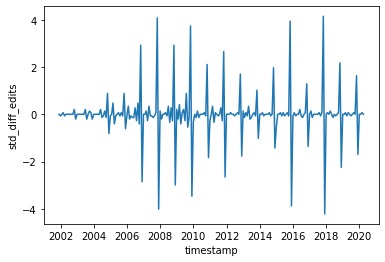

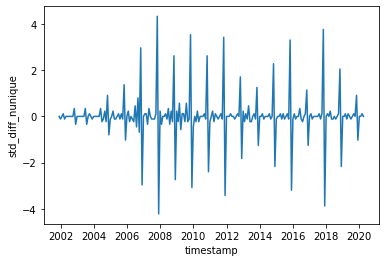

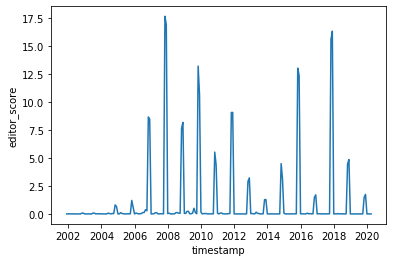

In [21]:
output_file = output_dir + "/mlb_editor_score.csv"

mlb_df = editor_engagement_score(mlb_alcs, output_file)

ax = sns.lineplot(x='timestamp', y='std_diff_edits', data=mlb_df)
plt.show()
ax = sns.lineplot(x='timestamp', y='std_diff_nunique', data=mlb_df)
plt.show()
ax = sns.lineplot(x='timestamp', y='editor_score', data=mlb_df)
plt.show()

0: Blizzard_Entertainment
Finished Calculating Editor Scores for 1 articles


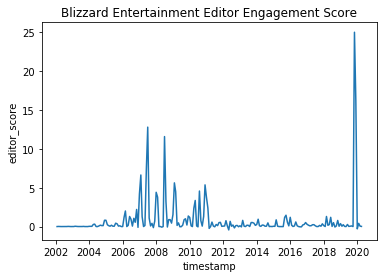

In [22]:
output_file = output_dir + "/blizzard_editor_score.csv"

blizzard_df = editor_engagement_score(blizzard, output_file)

ax = sns.lineplot(x='timestamp', y='editor_score', data=blizzard_df)
ax.set_title("Blizzard Entertainment Editor Engagement Score")
plt.show()

In [11]:
from engagement_score import selectArticlesDB

output_dir = "../data/out"
output_file = output_dir + "/editor_score.csv"
db_outfile = "../data/temp/articles.db"

df = selectArticlesDB(db_outfile, [])

editor_scores = editor_engagement_score(df, output_file)

SELECT * FROM ARTICLES
100/1500
200/1500
300/1500
400/1500
500/1500
600/1500
700/1500
800/1500
900/1500
1000/1500
1100/1500
1200/1500
1300/1500
1400/1500
1500/1500
Finished Calculating Editor Scores for 1500 articles


In [36]:
editor_scores[editor_scores['timestamp'] == "2020-03-31"].sort_values("editor_score", ascending=True)[:10][['article_title', 'timestamp', 'editor_score']]

,article_title,timestamp,editor_score
80705,Andromeda_(mythology),2020-03-31,-2.035509
245591,Robert_Bellarmine,2020-03-31,-1.750682
153897,Wikipedia_talk:WikiProject_Elements,2020-03-31,-1.711513
281935,Demographics_of_Croatia,2020-03-31,-1.097746
109800,Aston_Martin,2020-03-31,-0.805273
327342,"Colorado_Springs,_Colorado",2020-03-31,-0.754516
106946,Talk:Abraham_Lincoln,2020-03-31,-0.677800
19483,Aegean_Sea,2020-03-31,-0.564447
147927,Azores,2020-03-31,-0.473775
125092,Asexual_reproduction,2020-03-31,-0.464150


# 6. Downloading Page Views for the Articles

* We use Wikimedia's API mwviews to collect pageview information for articles

In [4]:
article_titles = []
lightdump_article_titles = "../data/temp/article_titles.txt"

with open(lightdump_article_titles) as file:
    for line in file:
        article_titles.append(line.strip())
print(len(article_titles))

1500


In [5]:
from engagement_score import get_page_views

temp_dir = "../data/temp"

pageviews_outfile = temp_dir + "/pageviews.csv"
    
views_df = get_page_views(article_titles, pageviews_outfile)

Writing Page View Data to -- ../data/temp/pageviews.csv -- for 1500 articles


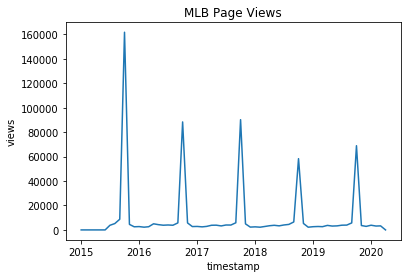

NameError: name 'df' is not defined

In [6]:
mlb_views = views_df[views_df["article_title"] == 'American_League_Championship_Series']

ax = sns.lineplot(x='timestamp', y='views', data=mlb_views)
ax.set_title("MLB Page Views")
plt.show()

mlb_df = df[df['article_title'] == 'American_League_Championship_Series']

ax = sns.lineplot(x='timestamp', y='avg_bytes', data=mlb_df)
ax.set_title("MLB Avg Byte Size")
plt.show()

# 7. Calculate the Content Scores

* Using Average Monthly Byte size and Page Views Per Month


In [23]:
from engagement_score import content_engagement_score

db_outfile = "../data/temp/articles.db"
pageviews_outfile = "../data/temp/pageviews.csv"
output_dir = "../data/out"

content_scores = content_engagement_score(pageviews_outfile, db_outfile, output_dir + "/content_engagement.csv")
content_scores['article_title'].nunique()

100/1498
200/1498
300/1498
400/1498
500/1498
600/1498
700/1498
800/1498
900/1498
1000/1498
1100/1498
1200/1498
1300/1498
1400/1498


1498

# 8. Calculate the Joint Engagement Score

* Multiply Content Score by Editor Score

In [24]:
from engagement_score import joint_engagement

engagement_score_outfile = '../data/out/engagement-score.csv'

engagement_df = joint_engagement(content_scores, editor_scores, engagement_score_outfile)


Finished Calculating Joint Engagement Scores for 1498 articles


,index,article_title,timestamp,editor_score,content_score,engagement_score
0,108429,April_27,2015-08-31,0.013252,-0.002161,-2.863303e-05
1,108430,April_27,2015-09-30,-0.000045,-0.000118,5.368578e-09
2,108431,April_27,2015-10-31,0.027244,0.000973,2.650620e-05
3,108432,April_27,2015-11-30,0.009900,-0.000089,-8.781212e-07
4,108433,April_27,2015-12-31,0.013684,0.002608,3.568996e-05
...,...,...,...,...,...,...
83506,198664,Big_Brother_(Nineteen_Eighty-Four),2019-11-30,0.967117,-0.029577,-2.860465e-02
83507,198665,Big_Brother_(Nineteen_Eighty-Four),2019-12-31,0.052785,-0.047207,-2.491854e-03
83508,198666,Big_Brother_(Nineteen_Eighty-Four),2020-01-31,0.000007,0.014172,9.664964e-08
83509,198667,Big_Brother_(Nineteen_Eighty-Four),2020-02-29,0.052785,-0.060404,-3.188455e-03


In [32]:
engagement_df[['engagement_score']]

engagement_score   -0.000029
Name: 0, dtype: float64

In [34]:
engagement_df[engagement_df['timestamp'] == "2020-03-31"].sort_values("engagement_score", ascending=False)[:10][['article_title', 'timestamp', 'engagement_score']]


,article_title,timestamp,engagement_score
7274,Black_Death,2020-03-31,50.834357
13403,ACE_inhibitor,2020-03-31,42.851727
65066,Comedy_film,2020-03-31,3.249220
53263,Canada–United_States_relations,2020-03-31,3.215105
17399,Andromeda_(mythology),2020-03-31,2.878393
17567,Alfonso_XIII_of_Spain,2020-03-31,2.633627
2683,Antimicrobial_resistance,2020-03-31,2.619916
30372,The_Plague,2020-03-31,2.476894
14208,History_of_Cuba,2020-03-31,1.894628
62540,Wikipedia_talk:WikiProject_Elements,2020-03-31,1.864518


In [ ]:
joint_blizzard = engagement_df[engagement_df['article_title'] == "Blizzard_Entertainment"]

sns.set_context(rc={"lines.linewidth": .80})

ax = sns.lineplot(x='timestamp', y='content_score', data=joint_blizzard, label="Content Score", color="blue")
ax.set_title("Blizzard Entertainment Content Score")

ax = sns.lineplot(x='timestamp', y='editor_score', data=joint_blizzard, label="Editor Score", color="red")
ax.set_title("Blizzard Entertainment Editor Score")

ax = sns.lineplot(x='timestamp', y='engagement_score', data=joint_blizzard, label="Joint Engagement Score", color="#4FD632")

ax.set_title("Blizzard Entertainment Engagement Score")
ax.legend()

plt.show()

In [ ]:
joint_mlb = engagement_df[engagement_df['article_title'] == "American_League_Championship_Series"]

ax = sns.lineplot(x='timestamp', y='content_score', data=joint_mlb, label="Content Score", color="blue")
ax.set_title("MLB ACLS Content Score")

ax = sns.lineplot(x='timestamp', y='editor_score', data=joint_mlb, label="Editor Score", color="red")
ax.set_title("MLB ACLS Editor Score")

ax = sns.lineplot(x='timestamp', y='engagement_score', data=joint_mlb, label="Joint Engagement Score", color="#4FD632")
ax.set_title("MLB ACLS Engagement Score")
ax.legend()

plt.show()

# 9. Prepare Data for Website JSON

* Parse Articles into Dict Structure for Google Visualizations
* Export to JSON

In [ ]:
# Convert engagement score DF to JSON Format

articles = list(engagement_df['article_title'].unique())
out_dict = {}

for article_title in articles:
    test_df = engagement_df[engagement_df['article_title'] == article_title][['timestamp', 'editor_score', 'content_score', 'engagement_score']]
    out_dict[article_title] = test_df.values.tolist()
    

* Dump Dict to JSON File
* Append "data =" so our javascript can read the JSON object


In [ ]:
import json
import datetime
 
def myconverter(o):
    if isinstance(o, datetime.datetime):
        return o.__str__()
    else:
        o.__str__()

score_outdir = "../website_data"

if not os.path.exists(score_outdir):
        os.makedirs(score_outdir, exist_ok=True)
        
with open(score_outdir + "/engagement_scores.json", 'w') as outfile:
    json.dump(out_dict, outfile, default=myconverter)
    
def line_prepender(filename, line):
    with open(filename, 'r+') as f:
        content = f.read()
        f.seek(0, 0)
        f.write(line.rstrip('\r\n') + content)
        
line_prepender(score_outdir + "/engagement_scores.json", "data = ")

In [ ]:
joint_df = engagement_df

joint_blizzard = joint_df[joint_df['article_title'] == "Blizzard_Entertainment"]

sns.set_context(rc={"lines.linewidth": 1.0})

ax = sns.lineplot(x='timestamp', y='content_score', data=joint_blizzard, label="Content Score", color="blue")
ax.set_title("Blizzard Entertainment Content Score")

plt.show()

ax = sns.lineplot(x='timestamp', y='editor_score', data=joint_blizzard, label="Editor Score", color="red")
ax.set_title("Blizzard Entertainment Editor Score")

plt.show()

ax = sns.lineplot(x='timestamp', y='engagement_score', data=joint_blizzard, label="Joint Engagement Score", color="#4FD632")

ax.set_title("Blizzard Entertainment Engagement Score")
ax.legend()

plt.show()

joint_mlb = joint_df[joint_df['article_title'] == "American_League_Championship_Series"]

ax = sns.lineplot(x='timestamp', y='content_score', data=joint_mlb, label="Content Score", color="blue")
ax.set_title("MLB ACLS Content Score")
plt.show()


ax = sns.lineplot(x='timestamp', y='editor_score', data=joint_mlb, label="Editor Score", color="red")
ax.set_title("MLB ACLS Editor Score")

plt.show()

ax = sns.lineplot(x='timestamp', y='engagement_score', data=joint_mlb, label="Joint Engagement Score", color="#4FD632")
ax.set_title("MLB ACLS Engagement Score")
ax.legend()

plt.show()

# Future Works

* We would be interesting in looking at the more extensive page views data
* Testing more equation weights to find an optimal score
* Test our score on a bigger variety of articles to see different edge cases